# Online Cakestand Sales: Cohort Analysis of UK E-Commerce in Python



In [327]:
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from textwrap import wrap

In [3]:
pd.__version__

'0.23.4'

In [4]:
online_data = pd.read_excel('online_retail.xlsx')

A first look at the dataset reveals some interesting variables for each order. As we are looking at the total purchases in particular time periods, it would be useful to create another column for total order amount as well. This is achieved by multiplying unit price with quantity purchased.

1. cumulative growth
3. top selling items by quantity
4. top selling items by total sales 
5. seasonality, top items across cohorts
6. average unit price across cohorts
7. rolling 30 day sales
8. average order by country
9. pareto of customers
10. retention cohort
11. look at refunds

In [106]:
online_data.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [33]:
len(online_data)

541909

In [126]:
online_data[online_data['Description'] == 'VICTORIAN SEWING BOX LARGE'].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
1187,536529,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-01 13:20:00,12.75,14237.0,United Kingdom
1929,536544,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-01 14:32:00,25.49,NaN,United Kingdom
2041,536557,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-01 14:41:00,12.75,17841.0,United Kingdom
2537,536592,21258,VICTORIAN SEWING BOX LARGE,3,2010-12-01 17:06:00,25.49,NaN,United Kingdom
4071,536746,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-02 13:39:00,12.75,16510.0,United Kingdom
4414,536782,21258,VICTORIAN SEWING BOX LARGE,1,2010-12-02 15:18:00,12.75,17567.0,United Kingdom
4880,C536814,21258,VICTORIAN SEWING BOX LARGE,-1,2010-12-02 17:03:00,12.75,13958.0,United Kingdom
5511,536864,21258,VICTORIAN SEWING BOX LARGE,3,2010-12-03 11:27:00,25.49,NaN,United Kingdom
5574,536865,21258,VICTORIAN SEWING BOX LARGE,4,2010-12-03 11:28:00,25.49,NaN,United Kingdom


In [130]:
main_df = online_data
main_df.columns = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price', 'cust_id','country']
main_df['tot_order'] = main_df['quantity']*main_df['unit_price']
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [134]:
main_df.shape

(541909, 9)

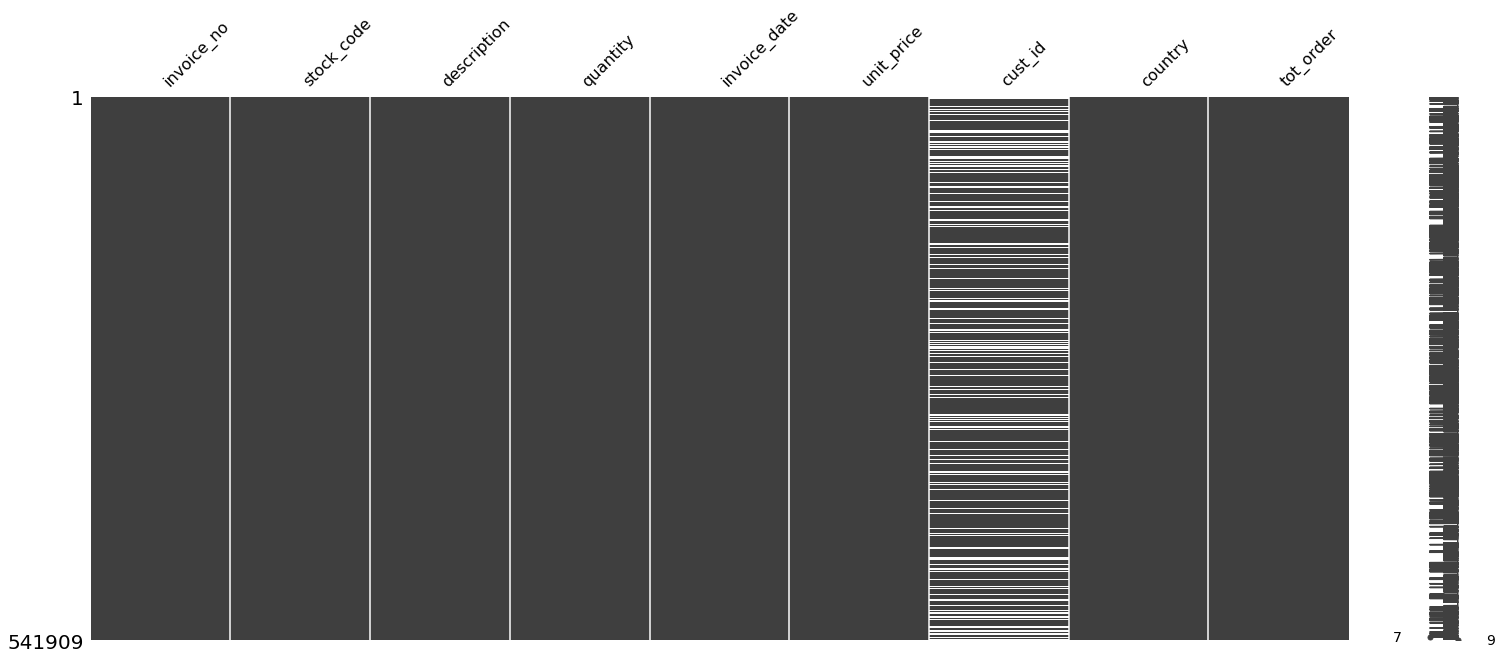

In [131]:
msno.matrix(main_df)

## Missing values

A quick visualization with missingno indicates that there are quite a few missing fields for customer ids. As we need to identify specific customers to place them in cohorts, we will have to drop the orders with missing customer ids. 

In [160]:
main_df = main_df[main_df['cust_id'].isna() == False]
main_df.reset_index()
main_df.drop(['index'], axis = 1, inplace=True)
main_df.shape

(406829, 9)

A look at the quantity values also reveal some negative values. These can be intepreted as refunds. As refunds could be interesting for analyses later, we save them in a separate dataframe and remove them from the main dataframe.

As total the quantity and total order values of refunds and the original purchase cancel out when the dataframe is grouped and aggregated later, specific matching orders do not have to be identified

In [161]:
refund_df = main_df[main_df['tot_order'] < 0]
refund_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


## Outliers

How about outliers in the data? Are there abnormally large order amounts? 

A look at the distribution for quantity and unit price show that the majority of values are in single digits. There however seems to be outliers of up to 80,995 for order quantity and 38,970 for unit price. 

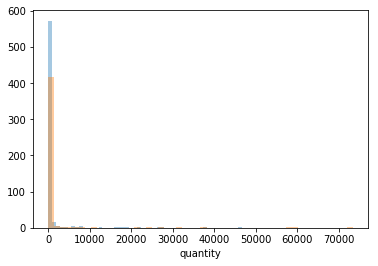

In [218]:
%matplotlib inline
plt = sb.distplot(main_df['unit_price'].value_counts(), kde = False)
plt = sb.distplot(main_df['quantity'].value_counts(), kde = False)

In [197]:
main_df[['quantity', 'unit_price', 'tot_order']].describe()

,quantity,unit_price,tot_order
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


By running a quick filter, we see that the outliers mostly lie in small ticket items  that cost around 1-2 pounds each. The most obvious outlier would be invoice number 581483. It seems that someone really really likes crafted paper birdies. 

In [196]:
main_df[(main_df['quantity'] > 1000) & (main_df['tot_order'] > 2500)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
13220,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755.0,Japan,3794.40
33074,540689,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1010,2011-01-11 08:43:00,3.24,17450.0,United Kingdom,3272.40
33075,540689,22469,HEART OF WICKER SMALL,1356,2011-01-11 08:43:00,1.93,17450.0,United Kingdom,2617.08
33076,540689,22470,HEART OF WICKER LARGE,1284,2011-01-11 08:43:00,3.21,17450.0,United Kingdom,4121.64
33645,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom,4921.50
33646,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom,3700.00
33647,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
33707,540818,47556B,TEA TIME TEA TOWELS,1300,2011-01-11 12:57:00,2.55,15749.0,United Kingdom,3315.00
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
63331,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92


In [200]:
main_df[main_df['tot_order'] == -168469.600000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
406350,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


Judging by this cancellation, maybe not so much ...

There doesn't seem to be any other entries within the outliers to suggest skewing the sales history especially when some of the largest tickets were all cancelled.

What about the unit price outliers? A look at the highest mean values bring up some suspect "products":
1. DOTCOM POSTAGE
2. CRUK Commission
3. Manual
4. Discount

In [221]:
main_df.groupby('description').mean()['unit_price'].nlargest(50)

description
DOTCOM POSTAGE                         744.147500
PICNIC BASKET WICKER 60 PIECES         649.500000
CRUK Commission                        495.839375
Manual                                 334.425634
REGENCY MIRROR WITH SHUTTERS           156.428571
RUSTIC  SEVENTEEN DRAWER SIDEBOARD     156.034483
VINTAGE RED KITCHEN CABINET            150.663043
VINTAGE BLUE KITCHEN CABINET           143.653846
CHEST NATURAL WOOD 20 DRAWERS          118.076923
LOVE SEAT ANTIQUE WHITE METAL          115.388889
Discount                                72.484545
VINTAGE POST OFFICE CABINET             66.360000
SCHOOL DESK AND CHAIR                   64.060000
DECORATIVE HANGING SHELVING UNIT        59.950000
CARRIAGE                                50.134328
BLUE PAINTED KASHMIRI CHAIR             49.950000
HALL CABINET WITH 3 DRAWERS             45.635000
PINK PAINTED KASHMIRI CHAIR             42.950000
CINDERELLA CHANDELIER                   42.170313
DANISH ROSE BEDSIDE CABINET           

'DOTCOM POSTAGE' seems to indicate the amount spent by the customer on postage. With an average of 744, this is over 200 times the average unit price of all products. Furthermore, postage isn't a direct indicator of sales and might skew the amount spent across cohorts. There also seems to be a similar label 'POSTAGE' which we will remove as well.

In [184]:
main_df[main_df['description'] == 'DOTCOM POSTAGE']['unit_price'].describe()

count      16.000000
mean      744.147500
std       540.829708
min        11.170000
25%       389.082500
50%       715.850000
75%       998.635000
max      1599.260000
Name: unit_price, dtype: float64

In [241]:
main_df[main_df['description'] == 'DOTCOM POSTAGE'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
230911,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,11.17
234331,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,16.46
242017,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,13.16
246634,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,85.58
256658,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,878.55


'CRUK Commission' sounded like a fee paid out to an external organization and a quick google search turned up related results at Cancer Research UK. This might be part of an initiative to pay out some proceeds to the cancer research effort. As this isn't directly related to sales, we should drop 'CRUK Commission' rows.

In [185]:
main_df[main_df['description'] == 'CRUK Commission']['unit_price'].describe()

count      16.000000
mean      495.839375
std       364.164786
min         1.600000
25%       284.252500
50%       471.770000
75%       668.977500
max      1100.440000
Name: unit_price, dtype: float64

In [243]:
main_df[main_df['description'] == 'CRUK Commission'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
230912,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,-1.60
234352,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,-13.01
242041,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,-15.96
246653,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,-52.24
257062,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,-608.66


'Manual' is a product that is rather nebulous. There are 465 records of Manual, with a single record commanding a unit price of 38,970. As we do not have specific information regarding the operations of this online retail company, I am making a guess that 'Manual' refers to manual services rendered with the purchase of other items. This could be the setting up of chandeliers or the shelves in a warehouse. As there are significant outliers for these transactions that do not directly tie to individual product sales, we will drop 'Manual' records too.

In [186]:
main_df[main_df['description'] == 'Manual']['unit_price'].describe()

count      465.000000
mean       334.425634
std       1935.070401
min          0.000000
25%          0.850000
50%          3.000000
75%        106.400000
max      38970.000000
Name: unit_price, dtype: float64

In [253]:
main_df[(main_df['description'] == 'Manual') & (main_df['unit_price'] > 5000)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
121405,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.0,16029.0,United Kingdom,-6930.0
159240,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,-38970.0


'Discount' seems to be a rather self explanatory category for discounts offered for products sold. This is further corroborated by the fact that all these transactions have negative sales quantities. As discounts directly tie into the price of products and impact sales directly, we will leave it in the dataframe.

In [187]:
main_df[main_df['description'] == 'Discount']['unit_price'].describe()

count      77.000000
mean       72.484545
std       219.271071
min         0.010000
25%        13.880000
50%        22.970000
75%        57.600000
max      1867.860000
Name: unit_price, dtype: float64

In [233]:
main_df[main_df['description'] == 'Discount'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
6748,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,-29.29
10234,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,-281.00
12760,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,-267.12
20712,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76


In [266]:
removed_cats = ['DOTCOM POSTAGE', 'CRUK Commission', 'Manual', 'POSTAGE']
main_df = main_df[~main_df['description'].isin(removed_cats)]
main_df.shape

(405136, 9)

In [446]:
main_df.groupby(['country','description']).sum()['tot_order'].nlargest(10)

country         description                       
United Kingdom  REGENCY CAKESTAND 3 TIER              103122.85
                WHITE HANGING HEART T-LIGHT HOLDER     88313.95
                JUMBO BAG RED RETROSPOT                75416.67
                PARTY BUNTING                          61952.58
                ASSORTED COLOUR BIRD ORNAMENT          52314.87
                CHILLI LIGHTS                          45155.61
                PICNIC BASKET WICKER 60 PIECES         39619.50
                PAPER CHAIN KIT 50'S CHRISTMAS         39596.73
                BLACK RECORD COVER FRAME               37799.42
                WOOD BLACK BOARD ANT WHITE FINISH      33408.76
Name: tot_order, dtype: float64

In [269]:
main_df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
tot_order              float64
dtype: object

1. cumulative growth
4. DONE top selling items by total sales 
5. seasonality, top items across cohorts
6. average unit price across cohorts
7. rolling 30 day sales
8. DONE average order by country
9. pareto of customers
10. retention cohort
11. DONE look at refunds

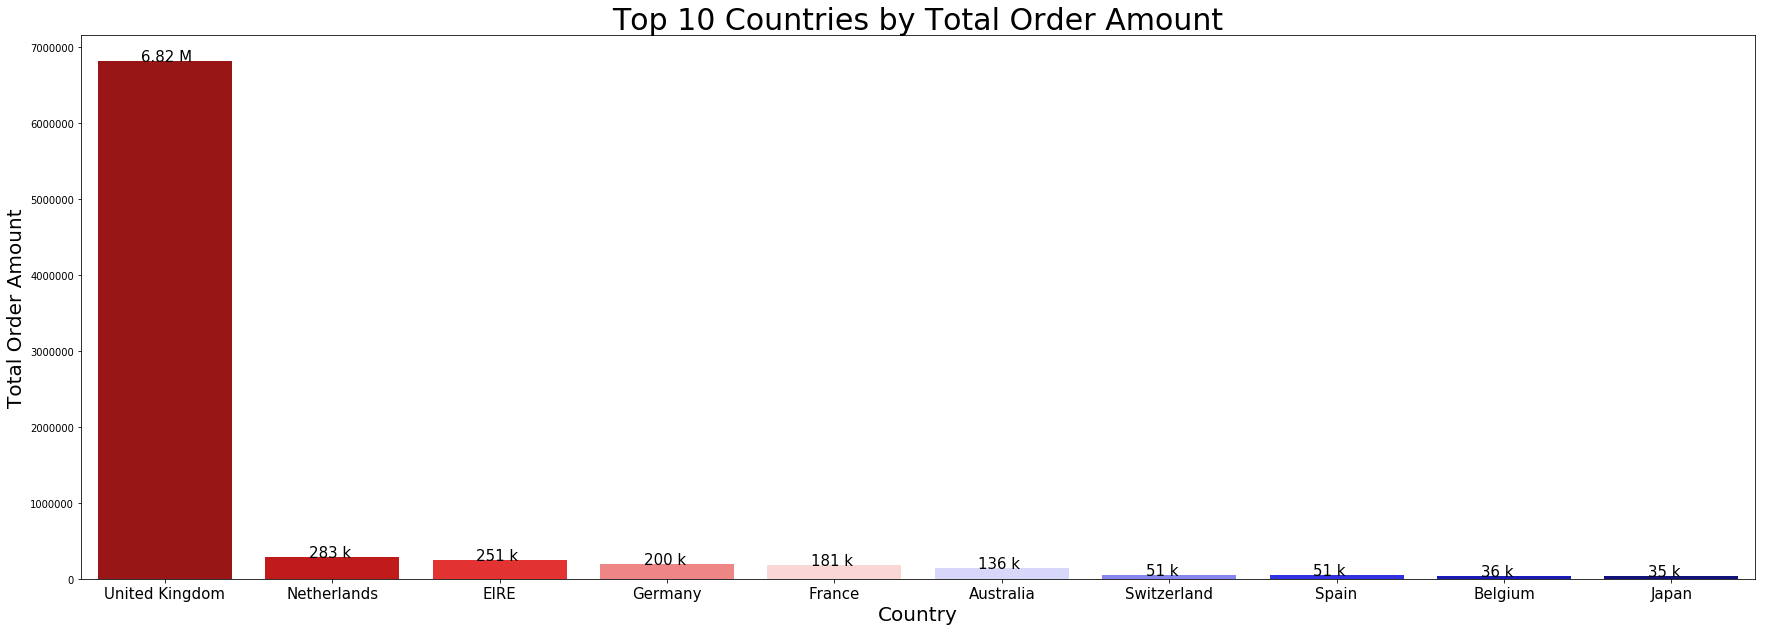

In [419]:
# total order amount by country
country_order = main_df.groupby('country').sum()['tot_order'].nlargest(10)

plt.figure(figsize = (30,10))
ax = sb.barplot(x = country_order.index, y = country_order.values, palette = 'seismic_r')
ax.set_xlabel('Country', fontsize = 20)
ax.set_ylabel('Total Order Amount', fontsize = 20)
ax.set_title('Top 10 Countries by Total Order Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in country_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in country_order.values:
    value_labels.append(str(int(x/1000))+' k')
value_labels[0] = '6.82 M'

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)

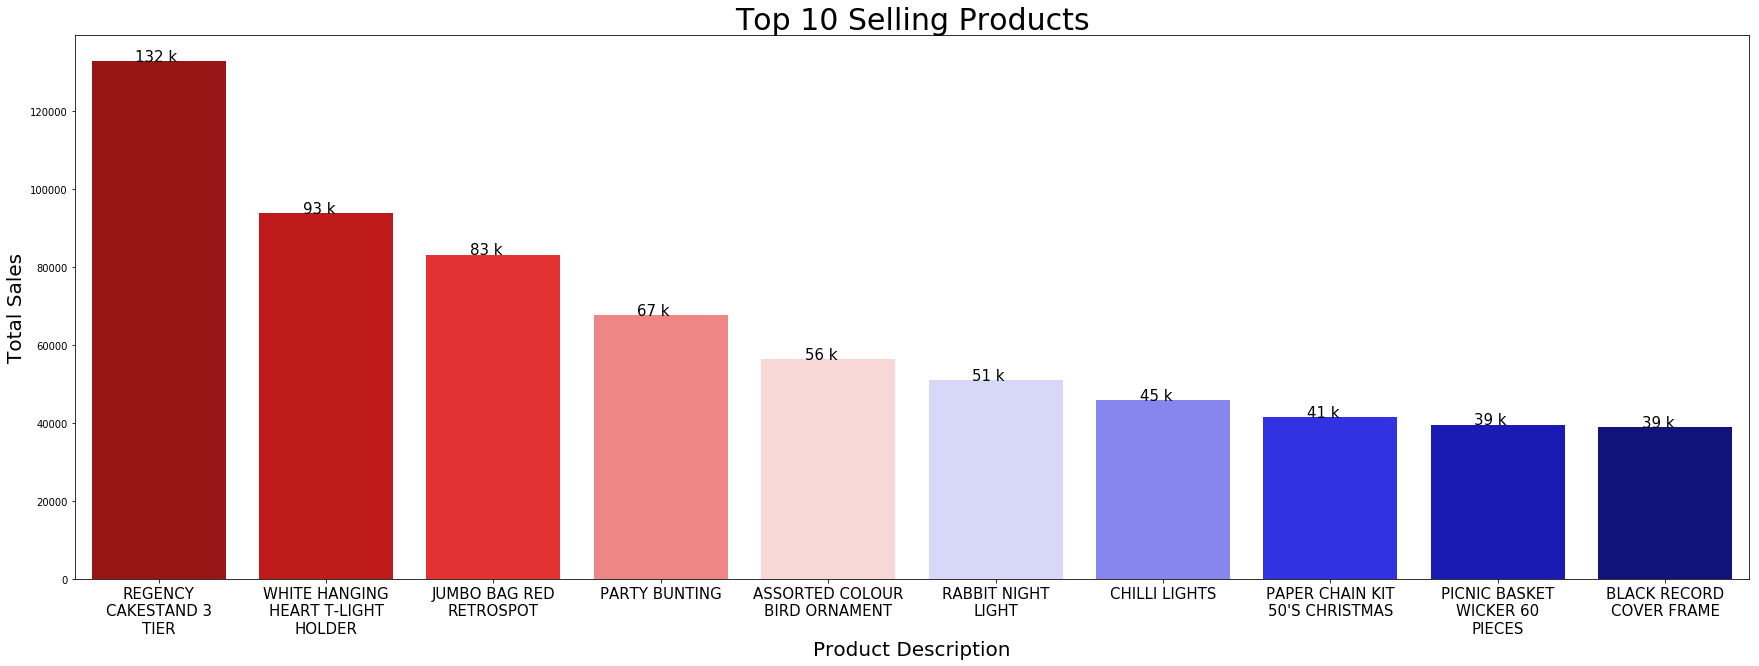

In [459]:
# top selling items by sales
sales_order = main_df.groupby('description').sum()['tot_order'].nlargest(10)

plt.figure(figsize = (30,10))
ax = sb.barplot(x = sales_order.index, y = sales_order.values, palette = 'seismic_r')
ax.set_xlabel('Product Description', fontsize = 20)
ax.set_ylabel('Total Sales', fontsize = 20)
ax.set_title('Top 10 Selling Products', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in sales_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in sales_order.values:
    value_labels.append(str(int(x/1000))+' k')

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)

With the top countries and products identified, we can now get into creating cohorts. 

## 1 Creating label for invoice period

We start off with creating a label for invoice date by applying strftime to the datetime object and creating a string representation of the year and month. 

In [460]:
main_df['invoice_period'] = main_df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))
main_df.head()
invoice_period_grouped = main_df.groupby('invoice_period')
invoice_period_agg = invoice_period_grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
invoice_period_agg.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
invoice_period_agg

,total_customers,total_product_types,total_units,tot_order
invoice_period,,,,
2010-12,948.0,2427,295957,549996.100
2011-01,780.0,2149,269139,472914.850
2011-02,794.0,2140,262820,434945.260
2011-03,1017.0,2248,343999,575002.240
2011-04,896.0,2234,278383,420368.331
2011-05,1077.0,2266,369059,651910.230
2011-06,1049.0,2366,356669,641967.370
2011-07,982.0,2390,363193,581676.861
2011-08,977.0,2395,386998,613232.000


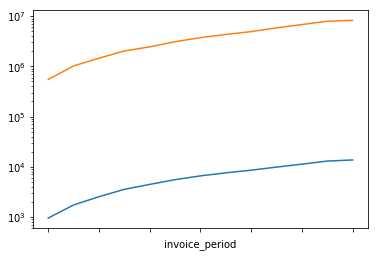

In [495]:
ax = invoice_period_agg['total_customers'].cumsum().plot()
ax2 = invoice_period_agg['tot_order'].cumsum().plot()
ax.set_yscale('log')

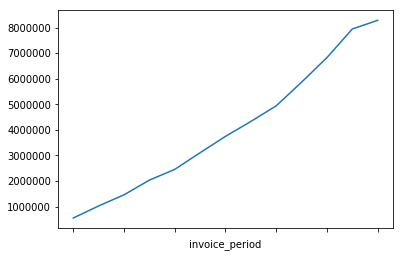

In [481]:
invoice_period_agg['tot_order'].cumsum().plot()

## 2 Creating a label for customer cohort group

As we do not have a sign up date for customers, we give them cohort labels based on their first purchase during this period of time. To do this, we group the transactions by customers and find the minimum of the invoice date. This will be the earliest purchase. The same strftime function is applied to create the new label for cohort group.

In [461]:
main_df.set_index('cust_id', inplace = True)
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,order_period,cohort_group,invoice_period
cust_id,,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12


In [462]:
main_df['cohort_group'] = main_df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,order_period,cohort_group,invoice_period
cust_id,,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12


In [463]:
main_df.reset_index(inplace = True)
main_df.head()

,cust_id,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,order_period,cohort_group,invoice_period
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12,2010-12


## 3 Aggregate metrics across cohort groups and invoice periods

Now that we have the labels for when a customer first made a purchase and when individual purchases occured, we can now create some aggregate metrics to represent each time period.

We count the total number of customers and products sold in a period by their unique ids and descriptions. We then sum the quantities sold and total invoice amount to get the aggregate sales figures for the periods.

In [464]:
grouped = main_df.groupby(['cohort_group','invoice_period'])
cohorts = grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
cohorts.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
cohorts.head()

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                   948.0                 2427   
             2011-01                   361.0                 1833   
             2011-02                   316.0                 1719   
             2011-03                   366.0                 1868   
             2011-04                   340.0                 1792   

                             total_units  tot_order  
cohort_group invoice_period                          
2010-12      2010-12              295957  549996.10  
             2011-01              158817  269782.69  
             2011-02              137715  230727.57  
             2011-03              179302  300720.43  
             2011-04              130568  199453.49

## 4 Creating a label for invoice period within cohort groups

For cohort analysis, it is imperative to identify purchases across the lifetime of this customer. For example, if a customer joined 5 months ago, we would need labels from 1-5 to identify metrics across each month. 

We create this label by first grouping our previous cohorts object by 'cohort_group'. We then find the length of each group and create a list to represent this range with np.arange(). For example, np.arange(5) returns [0, 1, 2, 3, 4].

As we want this list to start with 1, we add 1 to every number in this range.

In [465]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                   948.0                 2427   
             2011-01                   361.0                 1833   
             2011-02                   316.0                 1719   
             2011-03                   366.0                 1868   
             2011-04                   340.0                 1792   

                             total_units  tot_order  cohort_period  
cohort_group invoice_period                                         
2010-12      2010-12              295957  549996.10              1  
             2011-01              158817  269782.69              2  
             2011-02              137715  230727.57              3  
             2011-03              179302  300720.43              4  
             2011-04              130568  199453.49              5

## User Retention

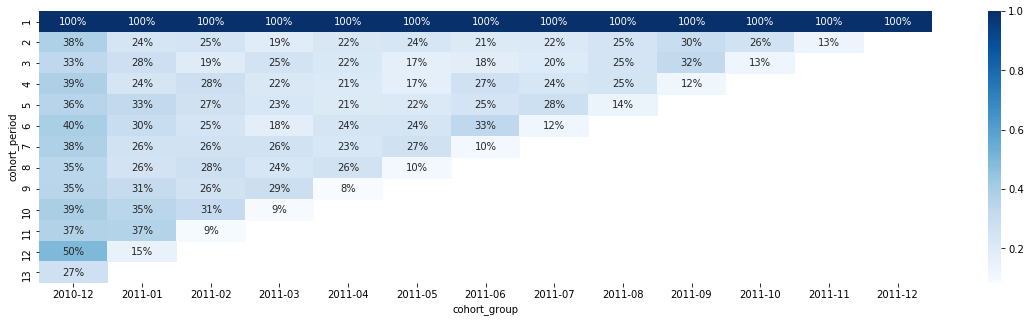

In [534]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

cohort_sizes = cohorts.groupby(level=0)['total_customers'].first()
user_retention = cohorts['total_customers'].unstack(0).divide(cohort_sizes, axis = 1)
plt.figure(figsize=(20,5))
sb.heatmap(user_retention, annot=True,cmap='Blues', fmt='.0%')

## Sales across cohorts

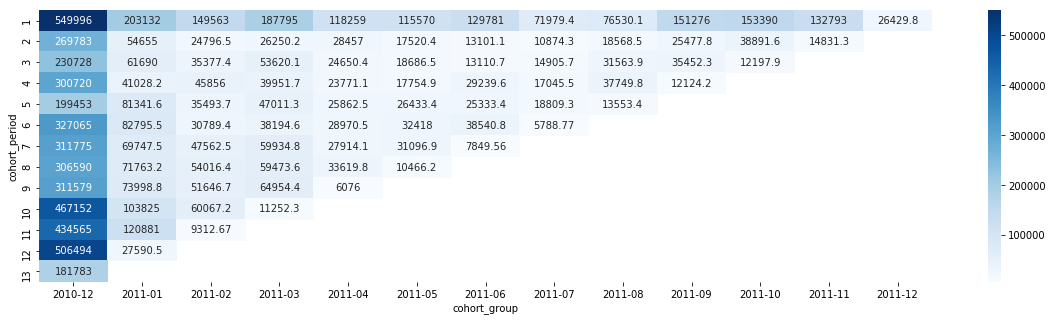

In [515]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

unstacked_order = cohorts['tot_order'].unstack(0)
plt.figure(figsize=(20,5))
sb.heatmap(unstacked_order, annot=True,cmap='Blues', fmt='g')

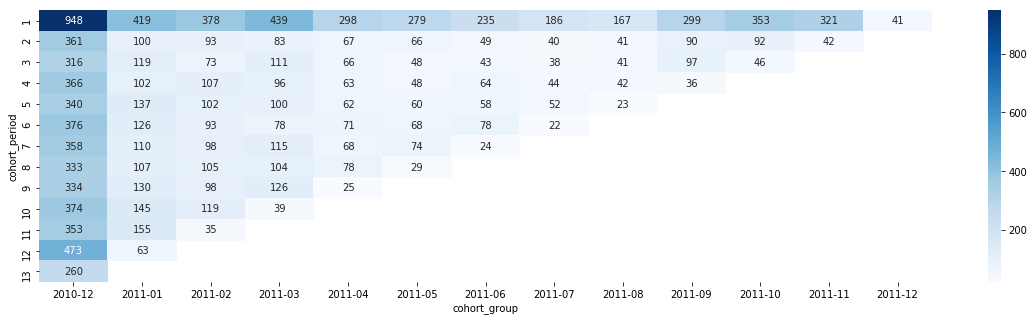

In [518]:
unstacked_cust = cohorts['total_customers'].unstack(0)
plt.figure(figsize=(20,5))
sb.heatmap(unstacked_cust, annot = True, cmap='Blues', fmt = 'g')

In [ ]:
# # time series

# time_df = main_df.set_index('invoice_date')

# %matplotlib inline
# agg_df = pd.concat([time_df['unit_price'],time_df['tot_order'].rolling(30).mean()], axis = 1)
# agg_df.plot(figsize=(20,10), linewidth=5, fontsize=20)

## Refunds/Cancellations

Lets take a look at refunds and what the most frequent and largest refunds are.

In [ ]:
refund_df = refund_df[~refund_df['description'].isin(removed_cats)]

plt.figure(figsize = (40,10))
ax = sb.barplot(x = refund_df['description'].value_counts().nlargest(10).index, y = refund_df['description'].value_counts().nlargest(10).values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Number of Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Frequency', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in refund_df['description'].value_counts().nlargest(10).index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, refund_df['description'].value_counts().nlargest(10).values):
    ax.annotate(label, (p.get_x() + 0.3, p.get_height() + 1), fontsize = 20)


In [ ]:
top_refund_amt = -refund_df.groupby('description').sum()['tot_order'].nsmallest(10)

plt.figure(figsize = (40,10))
ax = sb.barplot(x = top_refund_amt.index, y = top_refund_amt.values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Total Amount in Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Total Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in top_refund_amt.index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, top_refund_amt.values):
    ax.annotate(label, (p.get_x() + 0.2, p.get_height() + 10), fontsize = 20)

In [ ]:
large_refunds = refund_df['tot_order'].nsmallest(10).index
for refund in large_refunds:
    print(-refund_df.loc[refund]['quantity'], ' units of ', refund_df.loc[refund]['description'], ' refunded at ', -refund_df.loc[refund]['tot_order'])